In [1]:
import os

In [2]:
import cv2

In [5]:
PATH = '/home/siddhant/Datasets/Crash Dataset'
os.mkdir(f'{PATH}/test')

In [6]:
import cv2
vidcap = cv2.VideoCapture(f'{PATH}/11_23_08_19.mp4')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite(f"{PATH}/test/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [8]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip("video1.mp4", start_time, end_time, targetname="test.mp4")

NameError: name 'start_time' is not defined

In [5]:
PATH = '/home/siddhant/Datasets/Crash Dataset/DatasetOpR/notcrash'
videos = os.listdir(PATH)
i = 0
for vid in videos:
    os.mkdir(f'/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash_frames/{i}')
    vidcap = cv2.VideoCapture(f'{PATH}/{vid}')
    success,image = vidcap.read()
    count = 0
    while success:
        image = cv2.resize(image, (192, 128))
        if count < 10:
            cv2.imwrite(f'/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash_frames/{i}/000{count}.jpg', image) 
        if count in range(10, 100):
            cv2.imwrite(f'/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash_frames/{i}/00{count}.jpg', image)
        if count in range(100, 1000):
            cv2.imwrite(f'/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash_frames/{i}/0{count}.jpg', image) 
        if count in range(1000, 10000):
            cv2.imwrite(f'/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash_frames/{i}/{count}.jpg', image)
            # save frame as JPEG file      
        success,image = vidcap.read()
        #print('Read a new frame: ', success)
        count += 1
    
    i+=1

In [15]:
PATH = '/home/siddhant/Datasets/Crash Dataset/Not Crashing/4K Camera Carpark in Thailand- 3x zoom.mp4'

start_time = 0
end_time = 5

ffmpeg_extract_subclip(PATH, start_time, end_time, targetname="test.mp4")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [16]:
from moviepy.editor import *

In [17]:
clip = VideoFileClip("/home/siddhant/Datasets/Crash Dataset/Not Crashing/Traffic IP Camera video.mp4") 
print(clip.duration)

29.98


In [27]:
PATH = '/home/siddhant/Datasets/Crash Dataset/Not Crashing'
vids = os.listdir(PATH)
i = 1281
for vid in vids:
    clip = VideoFileClip(f'{PATH}/{vid}')
    start_time = 0
    end_time = start_time + 5
    
    dur = clip.duration
    while(end_time < dur):
        ffmpeg_extract_subclip(f'{PATH}/{vid}', start_time, end_time, targetname=f"/home/siddhant/Datasets/Crash Dataset/FinalDataset/NotCrash/{i}.mp4")
        start_time = end_time
        end_time = start_time + 5
        i += 1


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

In [13]:
i

NameError: name 'i' is not defined

In [10]:
def convertToHomogenousSample(sample, meanFrameValue):
    #here sample is a list of all frames, each frame is opencv image object
    extraFrames = abs(len(sample) - meanFrameValue)
    c = 0
    if(len(sample) > meanFrameValue):
        indicesToDelete = np.ndarray.tolist(np.linspace(0, len(sample) - 1, extraFrames))
        indicesToDelete = list(map(int, indicesToDelete))
        
        sampleOut = sample
        for i in indicesToDelete:
            i = i - c
            sampleOut.pop(i)
            c = c + 1
            
        #print(f"Number of frames deleted - {extraFrames}. They were at frame indices - {indicesToDelete}")
        return sampleOut
    
    
    elif(len(sample) < meanFrameValue):
        indicesToCopy = np.ndarray.tolist(np.linspace(0, len(sample) - 1, extraFrames ))
        indicesToCopy = list(map(int, indicesToCopy))
        
        sampleOut = sample
        for i in indicesToCopy:
            i = i + c
            sampleOut.insert(i + 1, sample[i])
            c = c + 1
        #print(f"Number of frames added - {extraFrames}. They are copies of frame indices - {indicesToCopy}")
        return sampleOut
    
    
    elif(len(sample) == meanFrameValue):
        return sample

In [11]:
def readSamples(pathToSample):
    # pathToSample points to dir containing the frames
    frames = os.listdir(pathToSample)
    frames.sort()
    sample = []
    for frame in frames:
        sample.append(cv2.imread(f'{pathToSample}/{frame}'))
    return sample

In [12]:
import cv2
import os
import numpy as np

In [13]:
def show(img, title="img"):
    cv2.imshow(title, img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [16]:
PATH = '/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/test'
classes = os.listdir(PATH)

for cls in classes:
    for sample in os.listdir(f'{PATH}/{cls}'):
        path = f'{PATH}/{cls}/{sample}'
        sample = readSamples(path)
        sample = convertToHomogenousSample(sample, 30)
        for file in os.listdir(path):
            os.remove(f'{path}/{file}')
        name_i = 0
        for img in sample:
            if name_i < 10:
                FILENAME = f'00{name_i}.png'
            else:
                FILENAME = f'0{name_i}.png'
            cv2.imwrite(f'{path}/{FILENAME}', img)
            name_i += 1
        print('.', end="")
    print('done')

..........................................done
........................done


In [31]:
PATH = '/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train'
for sample in os.listdir(f'{PATH}/Crash'):
    if len(os.listdir(f'{PATH}/Crash/{sample}')) < 15:
        shutil.rmtree(f'{PATH}/Crash/{sample}')

In [25]:
import shutil

In [75]:
import argparse
import cv2
import os
import glob
import sys
import numpy as np
import scipy.io as sio
import time

def cvReadGrayImg(img_path):
    return cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

def saveOptFlowToImage(flow, basename, merge):
    if merge:
        # save x, y flows to r and g channels, since opencv reverses the colors
        cv2.imwrite(basename+'.png', flow[:,:,::-1])
    else:
        cv2.imwrite(basename+'_x.JPEG', flow[...,0])
        cv2.imwrite(basename+'_y.JPEG', flow[...,1])

for vid in os.listdir('/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/'):
    vid_dir = f'/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/{vid}'
    os.mkdir(f'/home/siddhant/Codes/Accident Detection/opFlowDataset/train/NotCrash/{vid}')
    save_dir = f'/home/siddhant/Codes/Accident Detection/opFlowDataset/train/NotCrash/{vid}'

    bound = 15
    merge=True
    visual_debug=False

    norm_width = 500.
    bound = bound

    images = sorted(glob.glob(os.path.join(vid_dir,'*.png')))
    print(vid_dir)
    print ("Processing {}: {} files... ".format(vid_dir, len(images))),
    sys.stdout.flush()
    tic = time.time()
    img2 = cvReadGrayImg(images[0])
    for ind, img_path in enumerate(images[:-1]):
        img1 = img2
        img2 = cvReadGrayImg(images[ind+1])
        h, w = img1.shape
        fxy = norm_width / w
        # normalize image size
        flow = cv2.calcOpticalFlowFarneback(
            cv2.resize(img1, None, fx=fxy, fy=fxy),
            cv2.resize(img2, None, fx=fxy, fy=fxy), None,
                    pyr_scale=0.9, 
                    levels=5, 
                    winsize=5,
                    iterations=3,
                    poly_n=7, 
                    poly_sigma=1.2,
                    flags=0)
        # map optical flow back
        flow = flow / fxy
        # normalization
        flow = np.round((flow + bound) / (2. * bound) * 255.)
        flow[flow < 0] = 0
        flow[flow > 255] = 255
        flow = cv2.resize(flow, (w, h))

        # Fill third channel with zeros
        flow = np.concatenate((flow, np.zeros((h,w,1))), axis=2)

        # save
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        basename = os.path.splitext(os.path.basename(img_path))[0]
        saveOptFlowToImage(flow, os.path.join(save_dir, basename), merge)

        if visual_debug:
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv = np.zeros_like(cv2.imread(img_path))
            hsv[...,1] = 255
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

            cv2.imshow('optical flow',bgr)
            k = cv2.waitKey(30) & 0xff
            if k == 27:
                break

    # duplicate last frame
    basename = os.path.splitext(os.path.basename(images[-1]))[0]
    saveOptFlowToImage(flow, os.path.join(save_dir, basename), merge)
    toc = time.time()

/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/337
Processing /home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/337: 30 files... 
/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/231
Processing /home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/231: 30 files... 
/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/9
Processing /home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/9: 30 files... 
/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/302
Processing /home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/302: 30 files... 
/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/82
Processing /home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/82: 30 files... 
/home/siddhant/Datasets/Crash Dataset/Final_Preprocessed/train/NotCrash/133
Processing /home/siddhant/Datasets/Crash Data

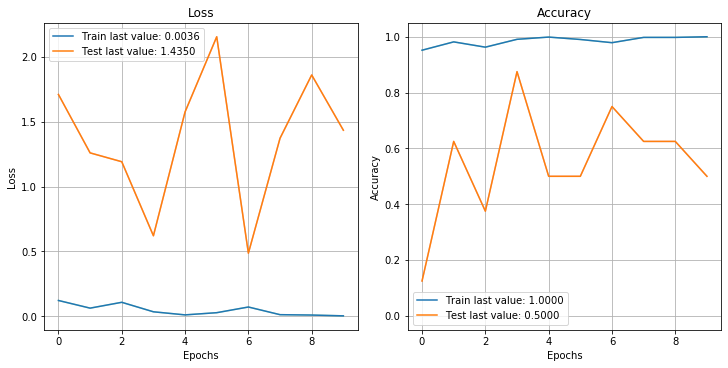

In [83]:
import pickle
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

with open('history3.pickle', 'rb') as file:
    # Call load method to deserialze
    hist = pickle.load(file)


plot_history(hist, path='opflow50epochs.png')
plt.show()

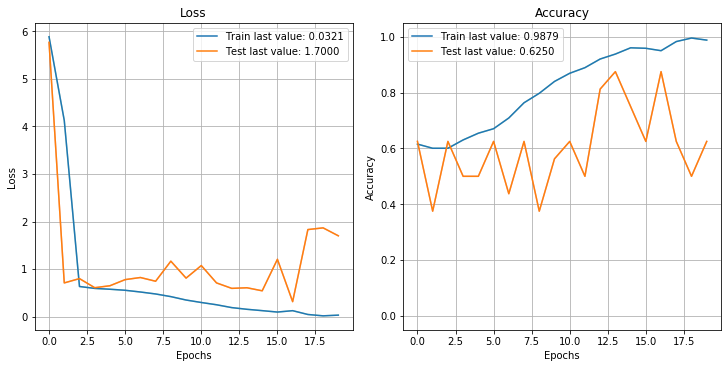

In [84]:
import pickle
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

with open('history_rgb.pickle', 'rb') as file:
    # Call load method to deserialze
    hist = pickle.load(file)


plot_history(hist, path='rgb50epochs.png')
plt.show()

In [85]:
import pickle
from plot_keras_history import plot_history
import matplotlib.pyplot as plt

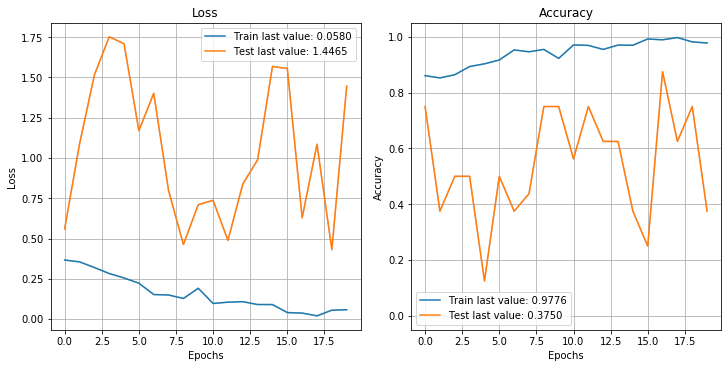

In [96]:
with open('history_flow2.pickle', 'rb') as file:
    # Call load method to deserialze
    hist1 = pickle.load(file)
plot_history(hist1, path="history_flow1.png")
plt.show()

In [101]:
vid_dir = '/home/siddhant/Codes/Accident Detection/opflow_sample'
os.mkdir('/home/siddhant/Codes/Accident Detection/opflow_sample2')
save_dir = '/home/siddhant/Codes/Accident Detection/opflow_sample2'

bound = 15
merge=True
visual_debug=False

norm_width = 500.
bound = bound

images = sorted(glob.glob(os.path.join(vid_dir,'*.png')))
print(vid_dir)
print ("Processing {}: {} files... ".format(vid_dir, len(images))),
sys.stdout.flush()
tic = time.time()
img2 = cvReadGrayImg(images[0])
for ind, img_path in enumerate(images[:-1]):
    img1 = img2
    img2 = cvReadGrayImg(images[ind+1])
    h, w = img1.shape
    fxy = norm_width / w
    # normalize image size
    flow = cv2.calcOpticalFlowFarneback(
        cv2.resize(img1, None, fx=fxy, fy=fxy),
        cv2.resize(img2, None, fx=fxy, fy=fxy), None,
                pyr_scale=0.9, 
                levels=5, 
                winsize=5,
                iterations=3,
                poly_n=7, 
                poly_sigma=1.2,
                flags=0)
    # map optical flow back
    flow = flow / fxy
    # normalization
    flow = np.round((flow + bound) / (2. * bound) * 255.)
    flow[flow < 0] = 0
    flow[flow > 255] = 255
    flow = cv2.resize(flow, (w, h))

    # Fill third channel with zeros
    flow = np.concatenate((flow, np.zeros((h,w,1))), axis=2)

    # save
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    basename = os.path.splitext(os.path.basename(img_path))[0]
    saveOptFlowToImage(flow, os.path.join(save_dir, basename), merge)

    if visual_debug:
        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        hsv = np.zeros_like(cv2.imread(img_path))
        hsv[...,1] = 255
        hsv[...,0] = ang*180/np.pi/2
        hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

        cv2.imshow('optical flow',bgr)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break

# duplicate last frame
basename = os.path.splitext(os.path.basename(images[-1]))[0]
saveOptFlowToImage(flow, os.path.join(save_dir, basename), merge)
toc = time.time()

/home/siddhant/Codes/Accident Detection/opflow_sample
Processing /home/siddhant/Codes/Accident Detection/opflow_sample: 0 files... 


IndexError: list index out of range

In [99]:
PATH = '/home/siddhant/Codes/Accident Detection/accident2.mp4'
i = 0

vidcap = cv2.VideoCapture(f'{PATH}')
success,image = vidcap.read()
count = 0
while success:
    image = cv2.resize(image, (192, 128))
    if count < 10:
        cv2.imwrite(f'/home/siddhant/Codes/Accident Detection/opflow_sample/000{count}.jpg', image) 
    if count in range(10, 100):
        cv2.imwrite(f'/home/siddhant/Codes/Accident Detection/opflow_sample/00{count}.jpg', image)
    if count in range(100, 1000):
        cv2.imwrite(f'/home/siddhant/Codes/Accident Detection/opflow_sample/0{count}.jpg', image) 
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1